<center><h1>INF-552 Lab 0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

**Name:** Anvitha Aravinda LNU  
**Github Username:** anvithaa-usc  
**USC ID:** 5622619837  

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [13]:
df = pd.read_csv(
    "../Data/Salaries.csv",
    index_col="playerID",  
    header=0,               
    skiprows=[1]
)

print(df.head())

           yearID teamID lgID  salary
playerID                             
bedrost01    1985    ATL   NL  550000
benedbr01    1985    ATL   NL  545000
campri01     1985    ATL   NL  633333
ceronri01    1985    ATL   NL  625000
chambch01    1985    ATL   NL  800000


#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [14]:
players = df[
    (df['teamID'].isin(['ATL', 'HOU'])) &
    (df['salary'] > 1000000)
]
player_ids = players.index

print(player_ids.tolist())

['hornebo01', 'murphda05', 'suttebr01', 'ryanno01', 'hornebo01', 'murphda05', 'suttebr01', 'ryanno01', 'griffke01', 'murphda05', 'suttebr01', 'ryanno01', 'murphda05', 'suttebr01', 'smithda02', 'murphda05', 'suttebr01', 'clancji01', 'davisgl01', 'ramirra01', 'scottmi03', 'smithda02', 'esaskni01', 'murphda05', 'smithlo01', 'suttebr01', 'whitter01', 'clancji01', 'darwida01', 'davisgl01', 'deshaji01', 'scottmi03', 'smithda02', 'breamsi01', 'esaskni01', 'gantro01', 'leibrch01', 'pendlte01', 'smithlo01', 'caminke01', 'deshaji01', 'ramirra01', 'scottmi03', 'berenju01', 'bielemi01', 'breamsi01', 'esaskni01', 'gantro01', 'glavito02', 'leibrch01', 'nixonot01', 'penaal01', 'pendlte01', 'smithlo01', 'smoltjo01', 'treadje01', 'biggicr01', 'caminke01', 'finlest01', 'jonesdo01', 'portuma01', 'blausje01', 'breamsi01', 'gantro01', 'glavito02', 'justida01', 'maddugr01', 'nixonot01', 'pendlte01', 'sandede02', 'smithpe02', 'smoltjo01', 'biggicr01', 'caminke01', 'drabedo01', 'finlest01', 'harnipe01', 'jone

#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [15]:
atl_salaries = df[df['teamID'] == 'ATL']['salary']

stats = {
    "Standard Deviation": atl_salaries.std(),
    "First Quartile (Q1)": atl_salaries.quantile(0.25),
    "Median": atl_salaries.median(),
    "Third Quartile (Q3)": atl_salaries.quantile(0.75),
    "Mean": atl_salaries.mean(),
    "Maximum": atl_salaries.max(),
    "Minimum": atl_salaries.min()
}

for k, v in stats.items():
    print(f"{k}: {v}")

Standard Deviation: 3434319.605441606
First Quartile (Q1): 300000.0
Median: 600000.0
Third Quartile (Q3): 2400000.0
Mean: 2207749.190960452
Maximum: 16061802
Minimum: 60000


#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [16]:
data_dict = {col: [] for col in df.columns}

for _, row in df.iterrows():
    for col in df.columns:
        data_dict[col].append(row[col])

print(data_dict.keys())


dict_keys(['yearID', 'teamID', 'lgID', 'salary'])


#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [17]:
new_headers = list(string.ascii_lowercase[:len(df.columns)])


new_df = pd.DataFrame(data_dict)
new_df.columns = new_headers

print(new_df.head())


      a    b   c       d
0  1985  ATL  NL  550000
1  1985  ATL  NL  545000
2  1985  ATL  NL  633333
3  1985  ATL  NL  625000
4  1985  ATL  NL  800000


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [18]:
import numpy as np

py_list = [[10, 20, 30],
           [40, 50, 60]]

arr = np.array(py_list)

print(arr)


[[10 20 30]
 [40 50 60]]


#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [19]:

arr = np.array([[10, 20, 30],
                [40, 50, 60]])

print("Array:")
print(arr)

print("ndim     :", arr.ndim)     
print("shape    :", arr.shape)   
print("size     :", arr.size)     
print("dtype    :", arr.dtype)    
print("itemsize :", arr.itemsize) 
print("data     :", arr.data)


Array:
[[10 20 30]
 [40 50 60]]
ndim     : 2
shape    : (2, 3)
size     : 6
dtype    : int64
itemsize : 8
data     : <memory at 0x15e85a740>


#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [20]:

# Original 2D array
arr = np.array([[1, 2, 3],
                [4, 5, 6]])

print("Original array:")
print(arr)

flat = arr.flatten()
print("\nFlattened array:")
print(flat)


reshaped1 = arr.reshape(3, 2) 
print("\nReshaped to (3,2):")
print(reshaped1)

reshaped2 = arr.reshape(1, 6)
print("\nReshaped to (1,6):")
print(reshaped2)

reshaped3 = arr.reshape(6, 1) 
print("\nReshaped to (6,1):")
print(reshaped3)


Original array:
[[1 2 3]
 [4 5 6]]

Flattened array:
[1 2 3 4 5 6]

Reshaped to (3,2):
[[1 2]
 [3 4]
 [5 6]]

Reshaped to (1,6):
[[1 2 3 4 5 6]]

Reshaped to (6,1):
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [21]:
import numpy as np

arr1 = np.array([10, 20, 30, 40, 50])
print("Original 1-D array:", arr1)

print("arr1[1:]   ->", arr1[1:])
print("arr1[:3]   ->", arr1[:3])
print("arr1[1:4]  ->", arr1[1:4])
print("arr1[::2]  ->", arr1[::2])
print("arr1[::-1] ->", arr1[::-1])

arr2 = np.array([[1, 2, 3],
                 [3, 4, 6],
                 [7, 8, 9]])
print("\nOriginal 2-D array:\n", arr2)

print("arr2[1:]       ->\n", arr2[1:])
print("arr2[:, 1:]    ->\n", arr2[:, 1:])
print("arr2[1:, 0:2]  ->\n", arr2[1:, 0:2])
print("arr2[:2, :2]   ->\n", arr2[:2, :2])
print("arr2[::-1]     ->\n", arr2[::-1])
print("arr2[:, ::-1]  ->\n", arr2[:, ::-1])

Original 1-D array: [10 20 30 40 50]
arr1[1:]   -> [20 30 40 50]
arr1[:3]   -> [10 20 30]
arr1[1:4]  -> [20 30 40]
arr1[::2]  -> [10 30 50]
arr1[::-1] -> [50 40 30 20 10]

Original 2-D array:
 [[1 2 3]
 [3 4 6]
 [7 8 9]]
arr2[1:]       ->
 [[3 4 6]
 [7 8 9]]
arr2[:, 1:]    ->
 [[2 3]
 [4 6]
 [8 9]]
arr2[1:, 0:2]  ->
 [[3 4]
 [7 8]]
arr2[:2, :2]   ->
 [[1 2]
 [3 4]]
arr2[::-1]     ->
 [[7 8 9]
 [3 4 6]
 [1 2 3]]
arr2[:, ::-1]  ->
 [[3 2 1]
 [6 4 3]
 [9 8 7]]


#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [22]:
arr = np.array([[1, 2, 3],
                [3, 4, 6],
                [7, 8, 9]])

print("Array:\n", arr)
print("\nmin      :", arr.min())
print("max      :", arr.max())
print("argmin   :", arr.argmin())   
print("argmax   :", arr.argmax())
print("mean     :", arr.mean())
print("sum      :", arr.sum())
print("std      :", arr.std())

print("\nsquare:\n", np.square(arr))
print("sqrt:\n", np.sqrt(arr))
print("abs:\n", np.abs(arr))
print("exp:\n", np.exp(arr))
print("sign:\n", np.sign(arr))   


print("\ndot:\n", np.dot(arr, arr))

print("\nmod (arr % 5):\n", np.mod(arr, 5))


Array:
 [[1 2 3]
 [3 4 6]
 [7 8 9]]

min      : 1
max      : 9
argmin   : 0
argmax   : 8
mean     : 4.777777777777778
sum      : 43
std      : 2.657391276244755

square:
 [[ 1  4  9]
 [ 9 16 36]
 [49 64 81]]
sqrt:
 [[1.         1.41421356 1.73205081]
 [1.73205081 2.         2.44948974]
 [2.64575131 2.82842712 3.        ]]
abs:
 [[1 2 3]
 [3 4 6]
 [7 8 9]]
exp:
 [[2.71828183e+00 7.38905610e+00 2.00855369e+01]
 [2.00855369e+01 5.45981500e+01 4.03428793e+02]
 [1.09663316e+03 2.98095799e+03 8.10308393e+03]]
sign:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]

dot:
 [[ 28  34  42]
 [ 57  70  87]
 [ 94 118 150]]

mod (arr % 5):
 [[1 2 3]
 [3 4 1]
 [2 3 4]]


#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

In [23]:
arr1 = np.arange(0, 10, 2)
print("arange(0,10,2):\n", arr1)

arr2 = np.ones((2, 3))
print("\nones((2,3)):\n", arr2)

arr3 = np.zeros((3, 2))
print("\nzeros((3,2)):\n", arr3)

arr4 = np.eye(3)
print("\neye(3):\n", arr4)

arr5 = np.linspace(0, 1, 5)
print("\nlinspace(0,1,5):\n", arr5)

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
concat1 = np.concatenate((a, b))
print("\nconcatenate 1D:\n", concat1)

x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6]])
concat2 = np.concatenate((x, y), axis=0)
print("\nconcatenate 2D (axis=0):\n", concat2)

z = np.array([[7], [8]])
concat3 = np.concatenate((x, z), axis=1)
print("\nconcatenate 2D (axis=1):\n", concat3)


arange(0,10,2):
 [0 2 4 6 8]

ones((2,3)):
 [[1. 1. 1.]
 [1. 1. 1.]]

zeros((3,2)):
 [[0. 0.]
 [0. 0.]
 [0. 0.]]

eye(3):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

linspace(0,1,5):
 [0.   0.25 0.5  0.75 1.  ]

concatenate 1D:
 [1 2 3 4 5 6]

concatenate 2D (axis=0):
 [[1 2]
 [3 4]
 [5 6]]

concatenate 2D (axis=1):
 [[1 2 7]
 [3 4 8]]


### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

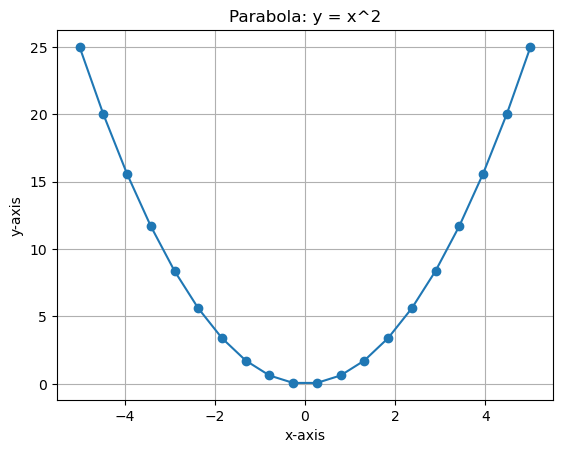

In [24]:



x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.plot(x, y, marker="o")

plt.title("Parabola: y = x^2")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)

plt.show()


What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
```

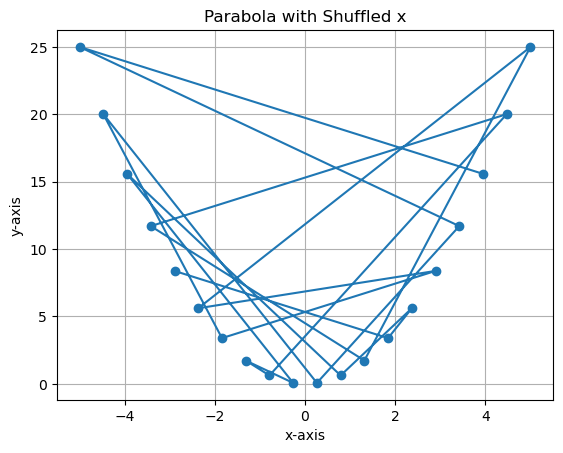

In [25]:
x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])

plt.plot(x, y, marker="o")

plt.title("Parabola with Shuffled x")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

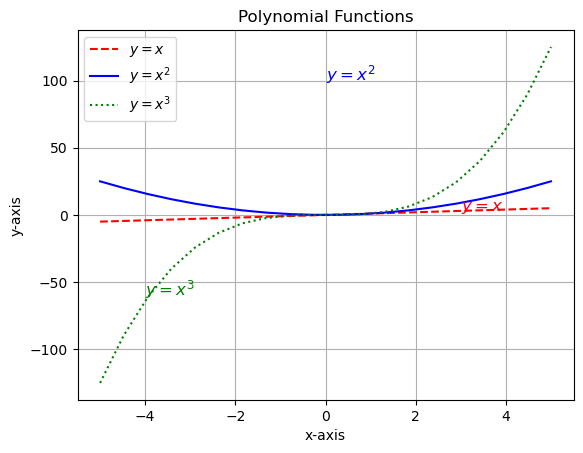

In [26]:


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])        
y2 = np.array([j ** 2 for j in x])   
y3 = np.array([j ** 3 for j in x])   


plt.plot(x, y1, 'r--', label=r"$y = x$")      
plt.plot(x, y2, 'b-',  label=r"$y = x^2$")    
plt.plot(x, y3, 'g:',  label=r"$y = x^3$")    


plt.title("Polynomial Functions")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.grid(True)


plt.text(0, 100, r"$y = x^2$", fontsize=12, color="blue")
plt.text(-4, -60, r"$y = x^3$", fontsize=12, color="green")
plt.text(3, 3, r"$y = x$", fontsize=12, color="red")

plt.show()


(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

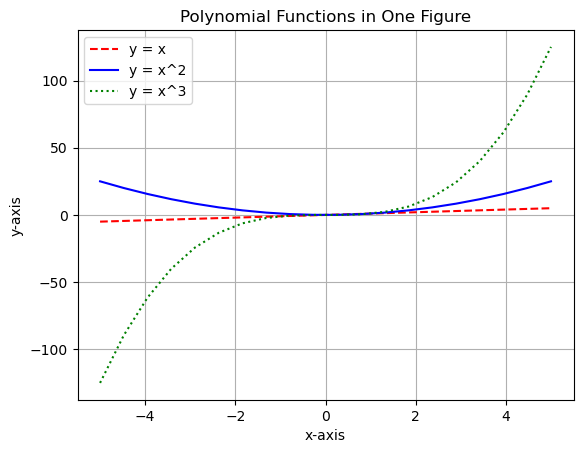

In [27]:

x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])        
y2 = np.array([j ** 2 for j in x])   
y3 = np.array([j ** 3 for j in x])   

plt.plot(x, y1, 'r--', label="y = x")     
plt.plot(x, y2, 'b-',  label="y = x^2")   
plt.plot(x, y3, 'g:',  label="y = x^3")


plt.title("Polynomial Functions in One Figure")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.grid(True)


plt.show()

(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

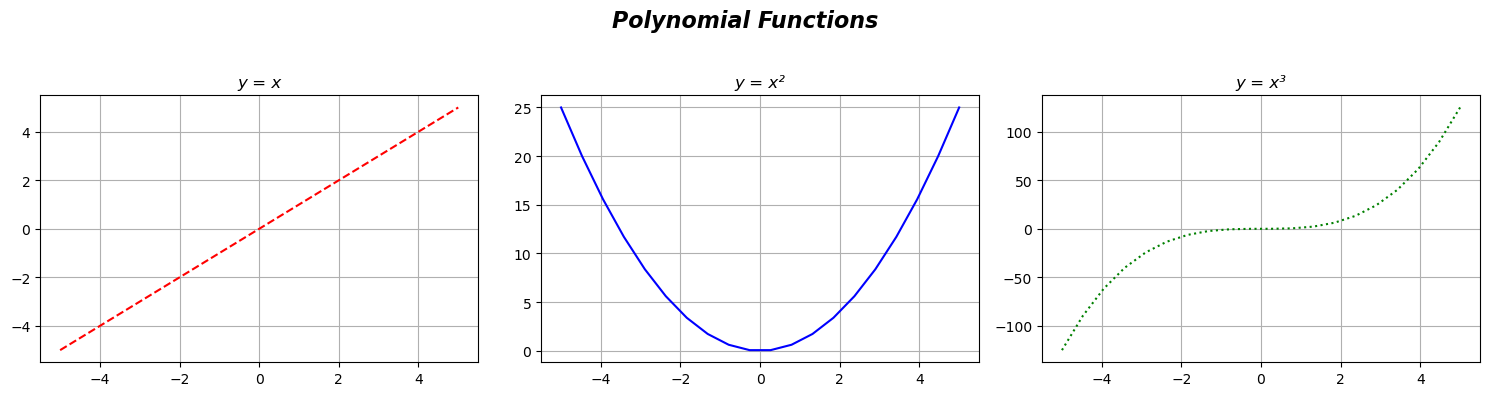

In [28]:



x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])        
y2 = np.array([j ** 2 for j in x])   
y3 = np.array([j ** 3 for j in x])   


fig, axes = plt.subplots(1, 3, figsize=(15, 4))


axes[0].plot(x, y1, 'r--')
axes[0].set_title("y = x", fontsize=12, fontstyle='italic')
axes[0].grid(True)

axes[1].plot(x, y2, 'b-')
axes[1].set_title("y = x²", fontsize=12, fontstyle='italic')
axes[1].grid(True)

axes[2].plot(x, y3, 'g:')
axes[2].set_title("y = x³", fontsize=12, fontstyle='italic')
axes[2].grid(True)


fig.suptitle("Polynomial Functions", fontsize=16, fontweight='bold', fontstyle='oblique')


plt.tight_layout(rect=[0, 0, 1, 0.95])


plt.show()


(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

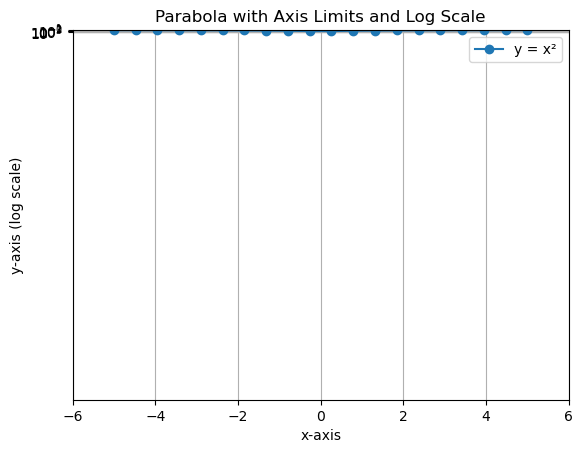

In [29]:
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.plot(x, y, marker="o", label="y = x²")

plt.xlim(-6, 6)
plt.ylim(0, 30)

plt.yscale("log")


plt.title("Parabola with Axis Limits and Log Scale")
plt.xlabel("x-axis")
plt.ylabel("y-axis (log scale)")
plt.legend()
plt.grid(True, which="both")

plt.show()

### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

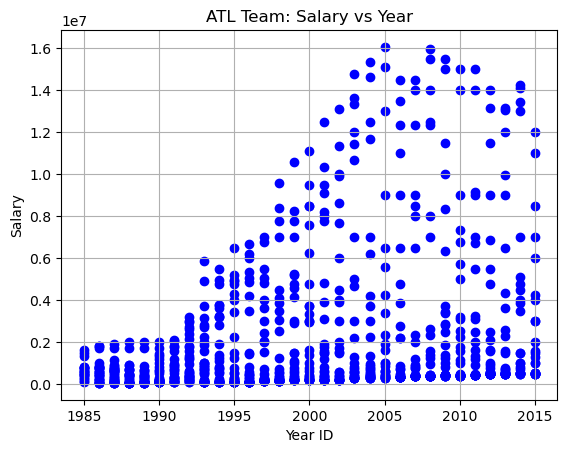

In [30]:
atl_df = df[df['teamID'] == 'ATL']

plt.scatter(atl_df['yearID'], atl_df['salary'], color="blue", marker="o")


plt.title("ATL Team: Salary vs Year")
plt.xlabel("Year ID")
plt.ylabel("Salary")

plt.grid(True)
plt.show()

(b) For year 1985, plot a bar chart to show the average salary for each team.

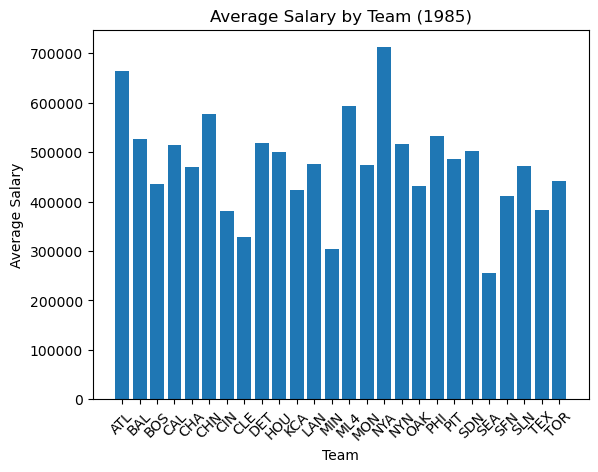

In [31]:


df_1985 = df[df['yearID'] == 1985]
avg_salary = df_1985.groupby('teamID')['salary'].mean()

plt.bar(avg_salary.index, avg_salary.values)
plt.title("Average Salary by Team (1985)")
plt.xlabel("Team")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()

(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

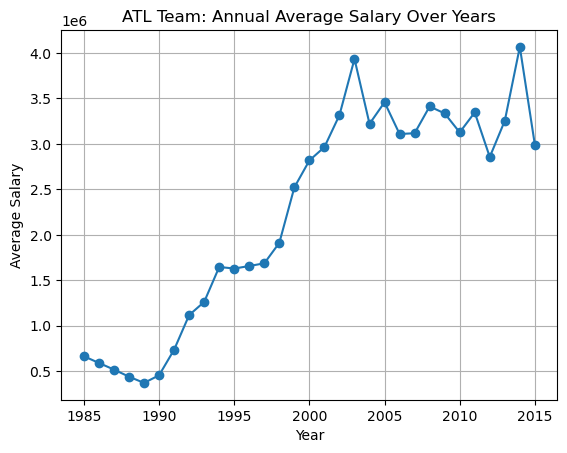

In [32]:
atl_df = df[df['teamID'] == 'ATL']
avg_salary_by_year = atl_df.groupby('yearID')['salary'].mean()

plt.plot(avg_salary_by_year.index, avg_salary_by_year.values, marker='o')
plt.title("ATL Team: Annual Average Salary Over Years")
plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.grid(True)
plt.show()

#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

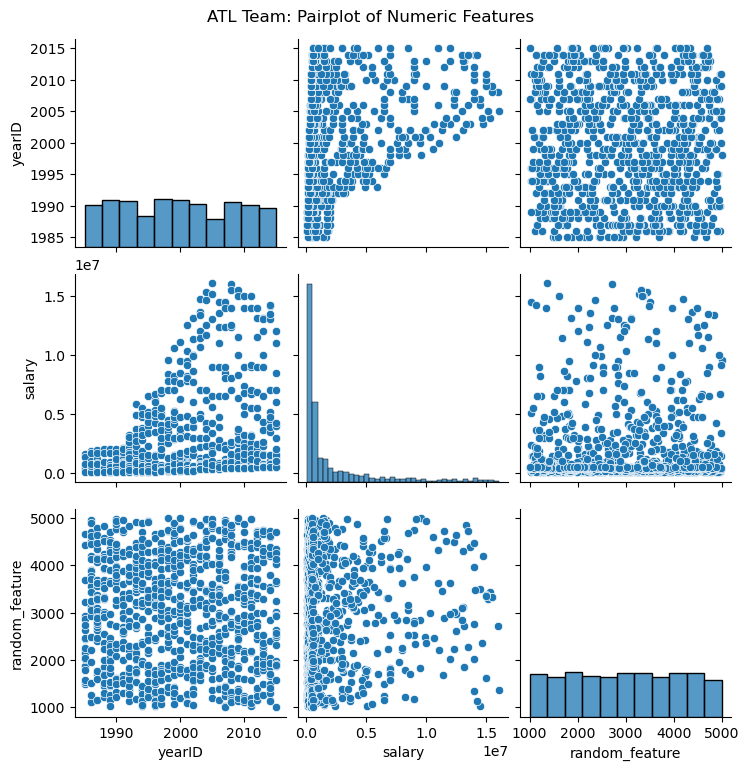

In [33]:


df['random_feature'] = np.random.randint(1000, 5000, size=len(df))
atl_df = df[df['teamID'] == 'ATL']

sns.pairplot(atl_df, vars=['yearID', 'salary', 'random_feature'])
plt.suptitle("ATL Team: Pairplot of Numeric Features", y=1.02)
plt.show()

(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

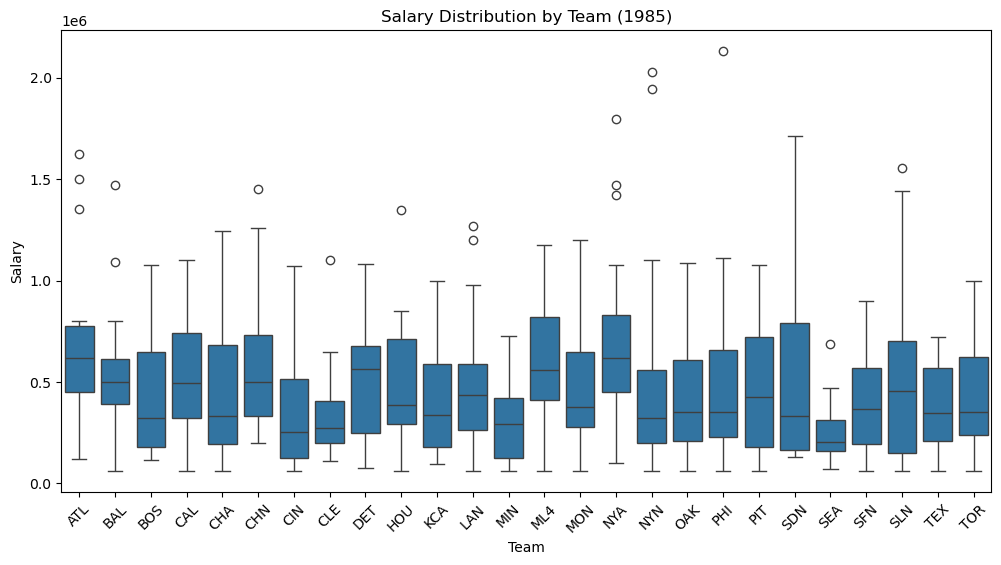

In [34]:
df_1985 = df[df['yearID'] == 1985]

plt.figure(figsize=(12,6))
sns.boxplot(x='teamID', y='salary', data=df_1985)
plt.title("Salary Distribution by Team (1985)")
plt.xlabel("Team")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()

(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.